In [ ]:
from base import *

# Activation Functions

Till now we were using Tanh. Now let's test with Relu and Sigmoid

In [3]:
class FCN_relu(nn.Module):
    "Defines a fully connected network"
    
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.ReLU
        self.fcs = nn.Sequential(*[
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation()])
        self.fch = nn.Sequential(*[
                        nn.Sequential(*[
                            nn.Linear(N_HIDDEN, N_HIDDEN),
                            activation()]) for _ in range(N_LAYERS-1)])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)
        
    def forward(self, x):
        x = self.fcs(x)
        x = self.fch(x)
        x = self.fce(x)
        return x

In [4]:
class FCN_sigmoid(nn.Module):
    "Defines a fully connected network"
    
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Sigmoid
        self.fcs = nn.Sequential(*[
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation()])
        self.fch = nn.Sequential(*[
                        nn.Sequential(*[
                            nn.Linear(N_HIDDEN, N_HIDDEN),
                            activation()]) for _ in range(N_LAYERS-1)])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)
        
    def forward(self, x):
        x = self.fcs(x)
        x = self.fch(x)
        x = self.fce(x)
        return x

## NN

> Relu

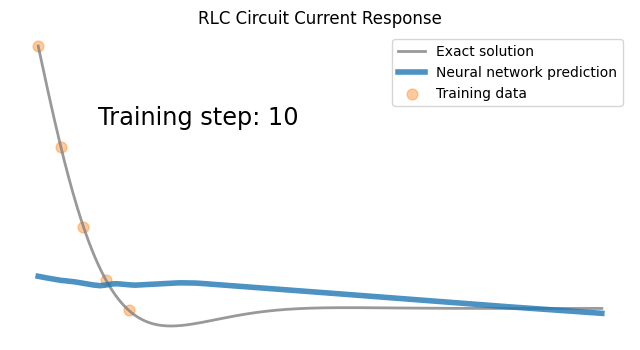

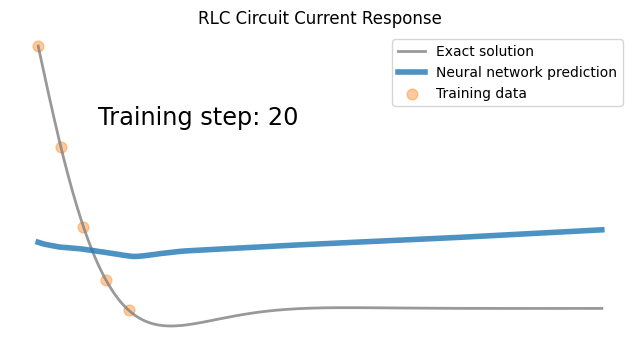

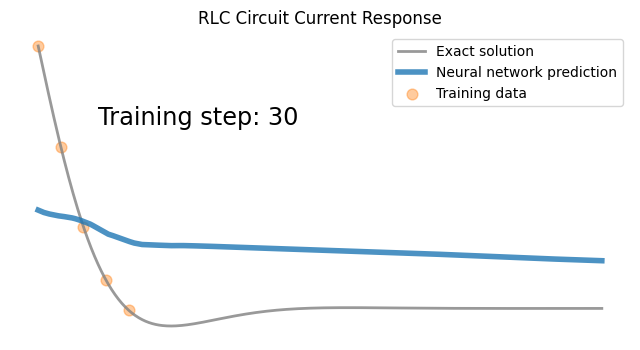

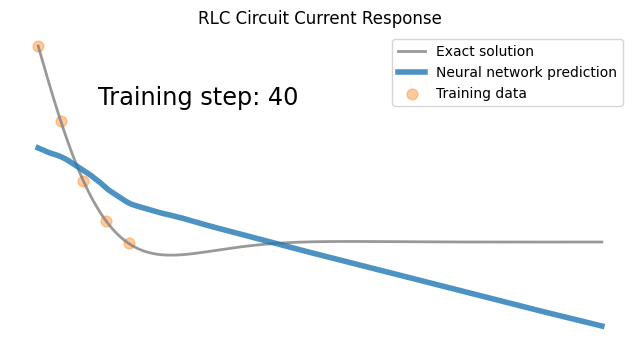

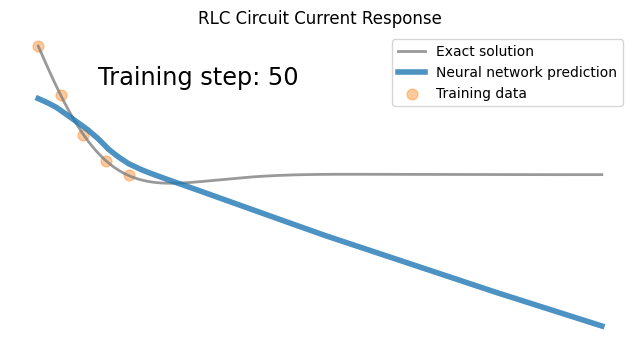

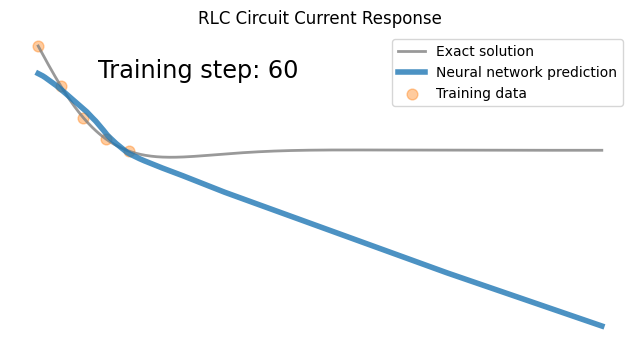

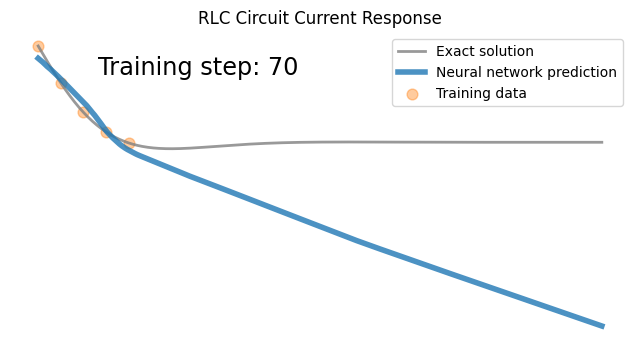

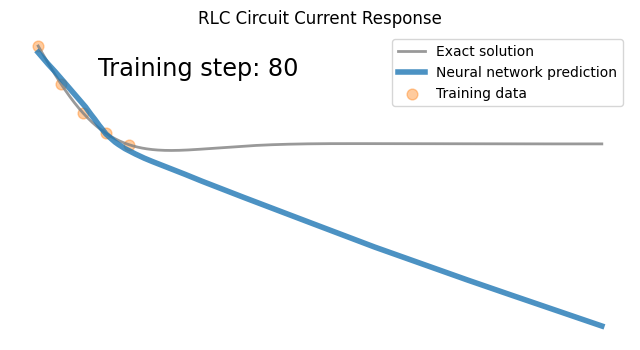

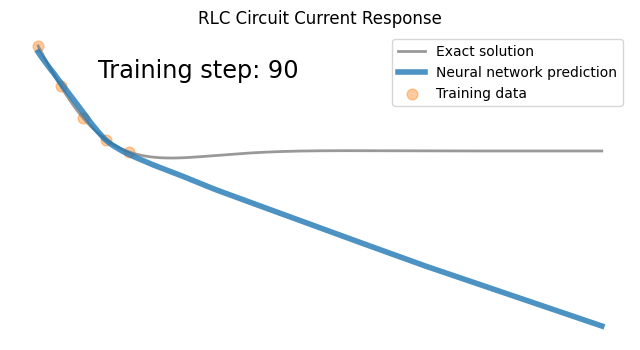

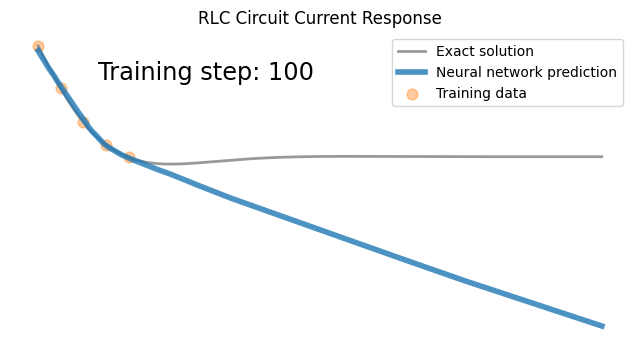

In [5]:
torch.manual_seed(123)

# Relu
model = FCN_relu(1, 1, 32, 3)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for i in range(100):
    optimizer.zero_grad()
    Ih = model(t_data)
    loss = loss_fn(Ih, I_data)  
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 10 == 0: 
        Ih_full = model(t).detach()  
        plot_result(t, I, t_data, I_data, Ih_full, i+1)
        plt.show()

> Sigmoid

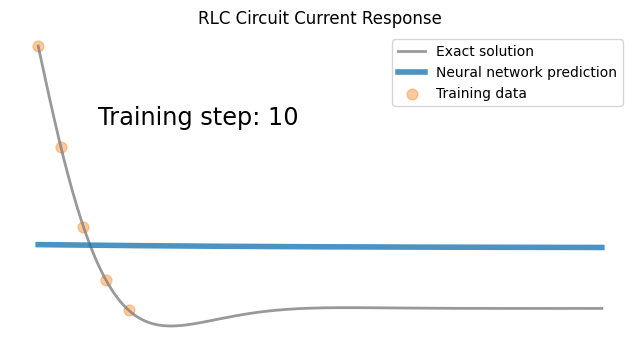

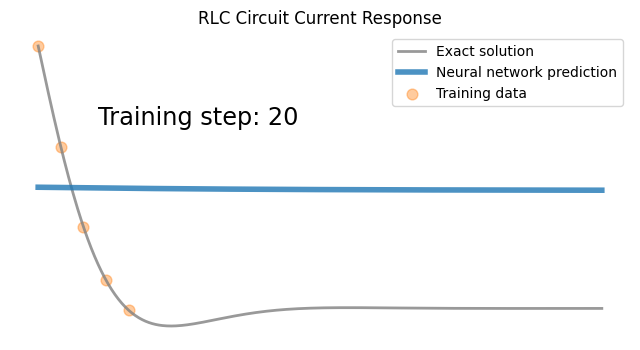

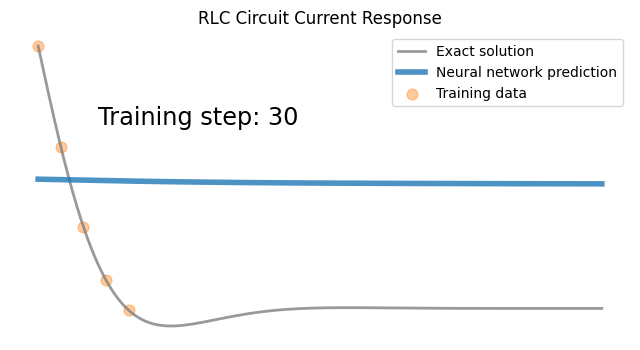

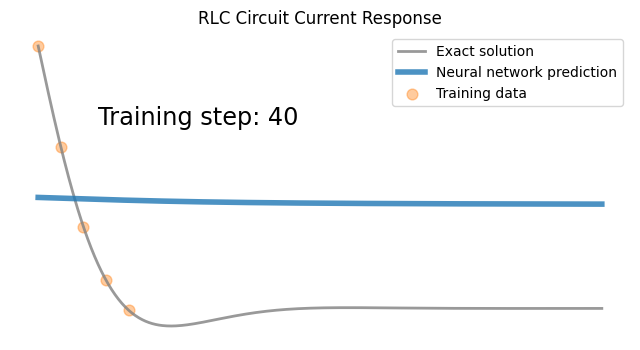

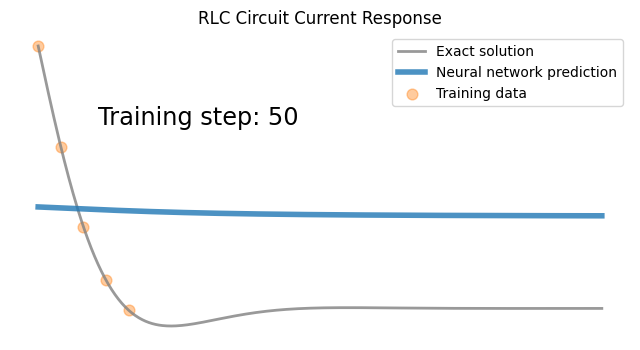

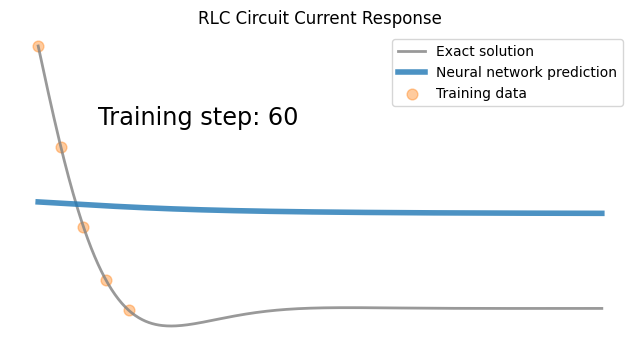

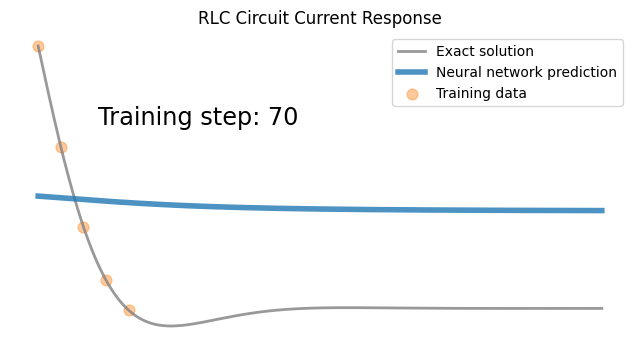

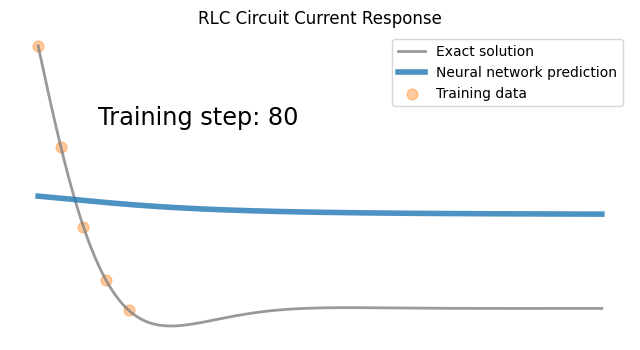

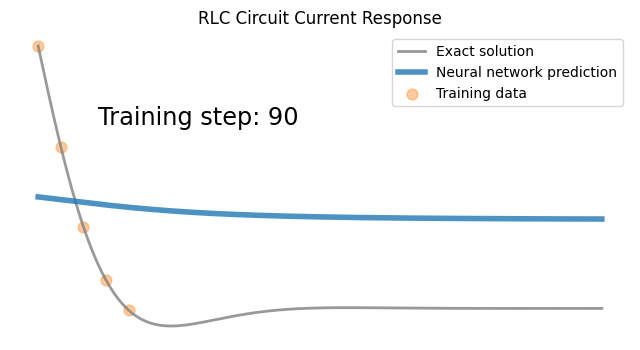

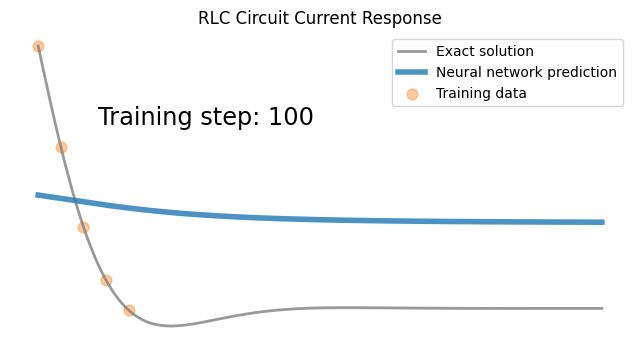

In [6]:
torch.manual_seed(123)

# Sigmoid
model = FCN_sigmoid(1, 1, 32, 3)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for i in range(100):
    optimizer.zero_grad()
    Ih = model(t_data)
    loss = loss_fn(Ih, I_data)  
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 10 == 0: 
        Ih_full = model(t).detach()  
        plot_result(t, I, t_data, I_data, Ih_full, i+1)
        plt.show()

### Inference

- **Relu**
  - It takes longer to predict the training data set correctly, and loss function remains significantly higher even later.
  
- **Sigmoid**
  - Only 1 value is predicted correctly, even unable to predict the training data correctly. Not well suited for this problem.

## PINN

> Relu

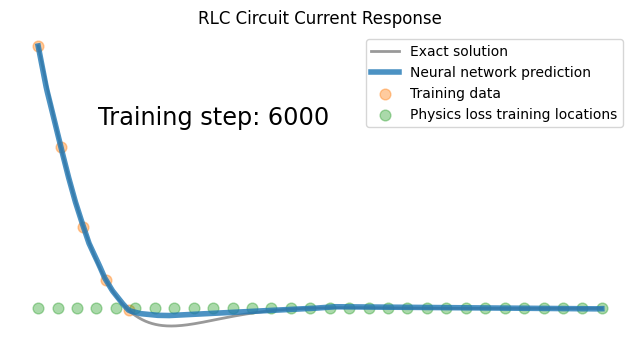

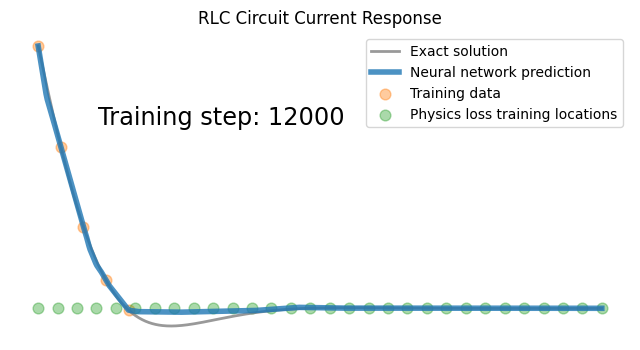

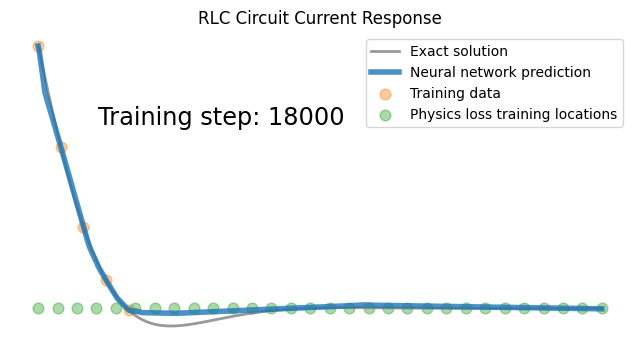

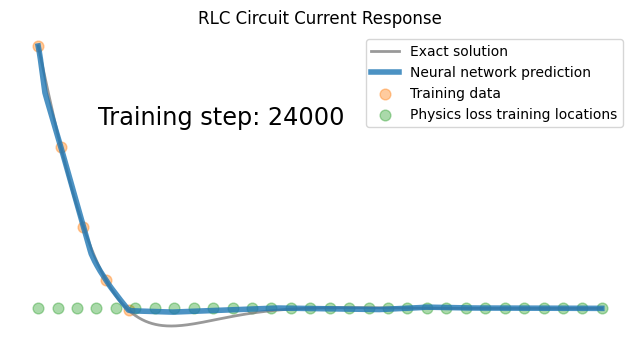

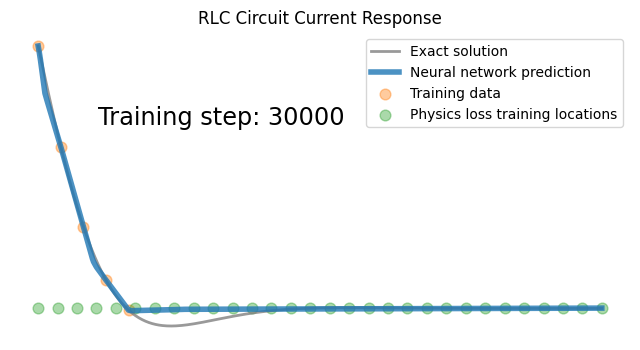

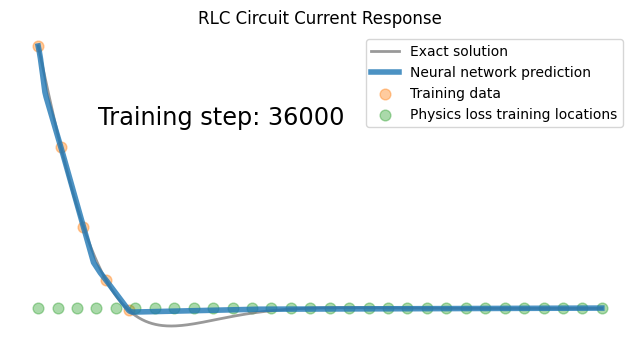

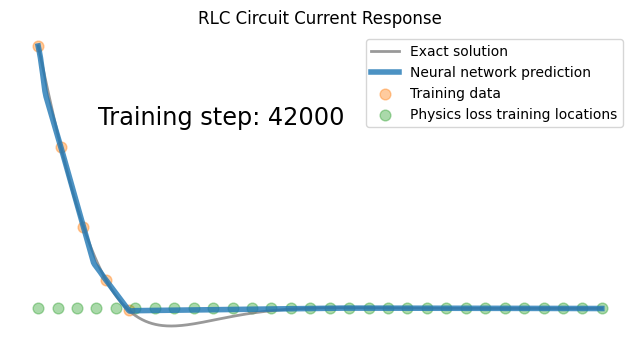

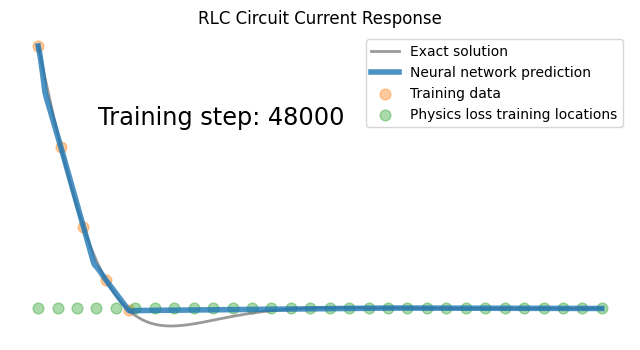

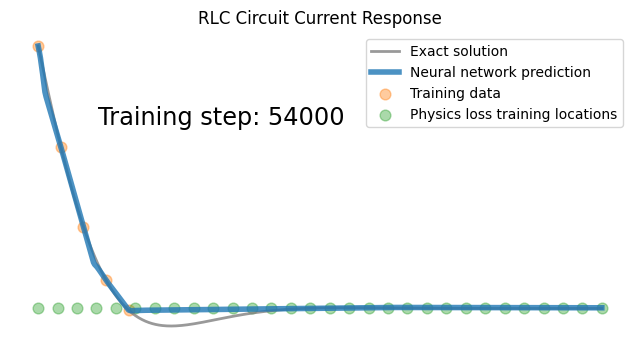

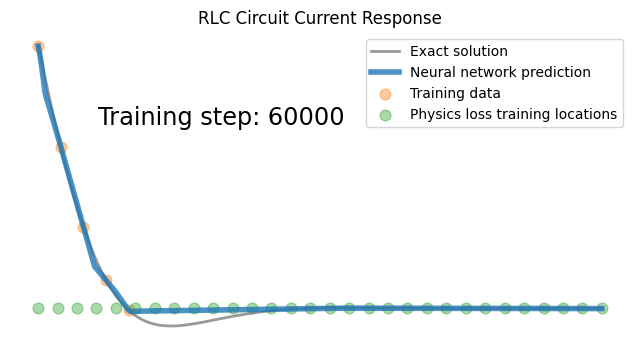

In [7]:
t_physics = torch.linspace(0, 10, 30).view(-1,1).requires_grad_(True) 

torch.manual_seed(123)
# Relu
model = FCN_relu(1, 1, 32, 3)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for i in range(60000):
    optimizer.zero_grad()
    
    Ih = model(t_data) 
    loss1 = loss_fn(Ih, I_data)  
    
    Ihp = model(t_physics)
    dx  = torch.autograd.grad(Ihp, t_physics, torch.ones_like(Ihp), create_graph=True)[0]
    dx2 = torch.autograd.grad(dx,  t_physics, torch.ones_like(dx), create_graph=True)[0]

    physics = L * dx2 + R * dx + (1 / C) * Ihp
    loss2 = (1e-4) * torch.mean(physics**2)
    
    loss = loss1 + loss2  
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 6000 == 0:
        Ih = model(t).detach()
        tp = t_physics.detach()
        plot_result(t, I, t_data, I_data, Ih, i+1, tp)
        plt.show()
            


> Sigmoid

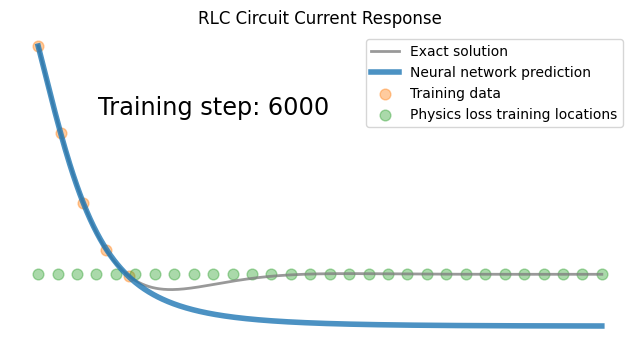

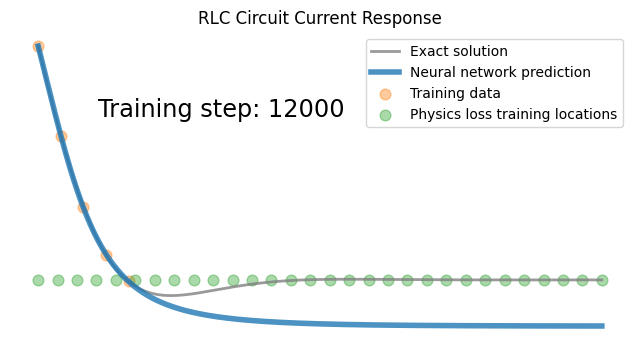

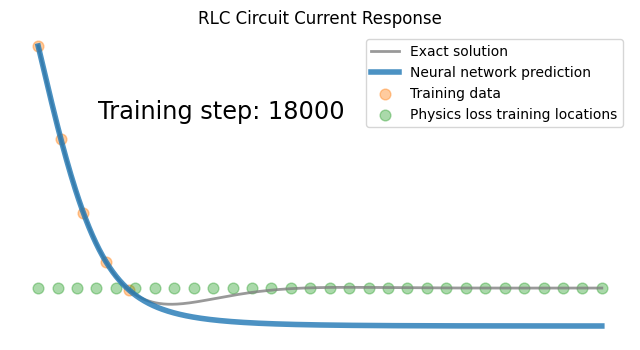

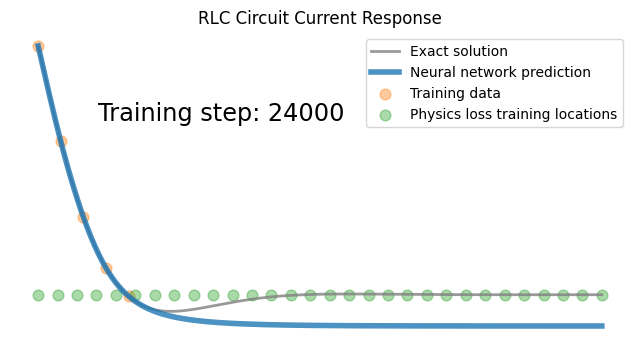

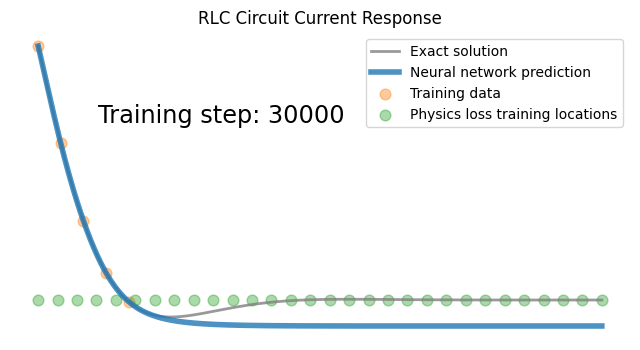

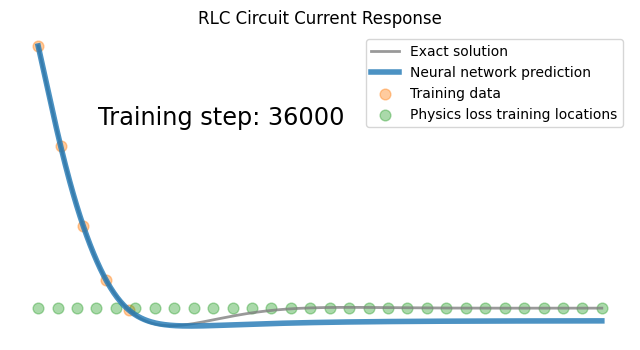

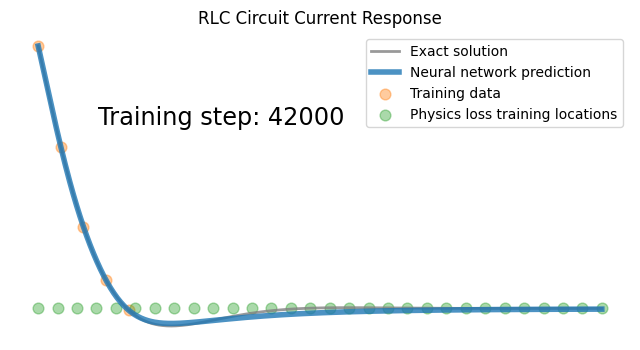

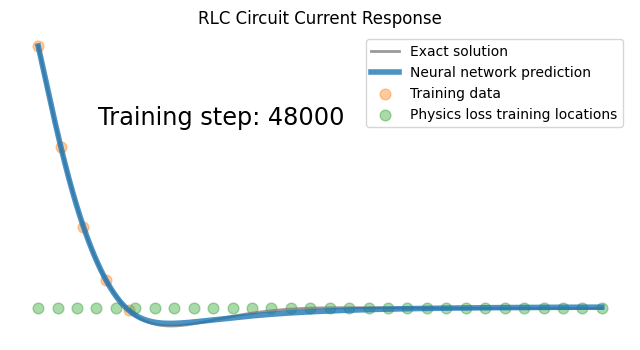

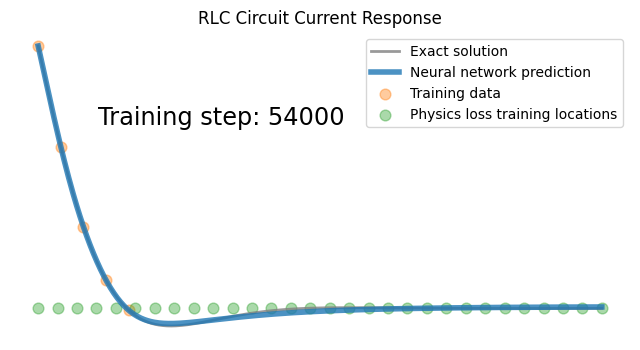

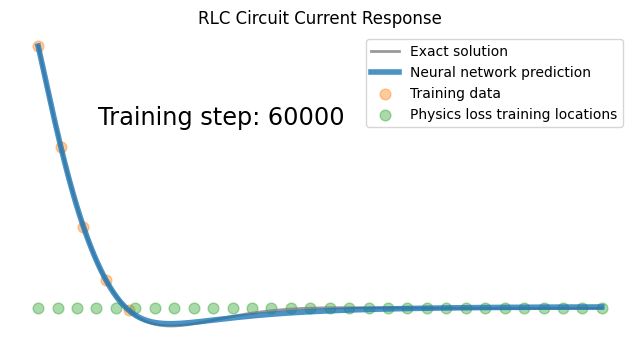

In [8]:
t_physics = torch.linspace(0, 10, 30).view(-1,1).requires_grad_(True) 

torch.manual_seed(123)
# Sigmoid 
model = FCN_sigmoid(1, 1, 32, 3)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for i in range(60000):
    optimizer.zero_grad()
    
    Ih = model(t_data) 
    loss1 = loss_fn(Ih, I_data)  
    
    Ihp = model(t_physics)
    dx  = torch.autograd.grad(Ihp, t_physics, torch.ones_like(Ihp), create_graph=True)[0]
    dx2 = torch.autograd.grad(dx,  t_physics, torch.ones_like(dx), create_graph=True)[0]

    physics = L * dx2 + R * dx + (1 / C) * Ihp
    loss2 = (1e-4) * torch.mean(physics**2)
    
    loss = loss1 + loss2  
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 6000 == 0:
        Ih = model(t).detach()
        tp = t_physics.detach()
        plot_result(t, I, t_data, I_data, Ih, i+1, tp)
        plt.show()


## Inference

- **Relu**
  - Unable to predict a output in a small interval and comes to a halt.
  - Worse Generalization, Accuracy, Convergence
  
- **Sigmoid**
  - Takes slightly longer to predict the output correctly.
  - Sligtly worse Generalization, Accuracy, Convergence